In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created 2020

@author: Tobias Strübing
"""
import sys
sys.path.insert(1, '..')

import eSEC_analyser as analyse

## The first step is to import eSEC matrices from an PDF file. These matrices will be saved as a python dict that contains numpy arrays.

In [2]:
#see all functions of this module
help(analyse)

Help on module eSEC_analyser:

NAME
    eSEC_analyser - Created 2020-2021

DESCRIPTION
    @author: Tobias Strübing

FUNCTIONS
    checkSimilarRows(esec_dict, combination, rows=[3, 2, 5, 7, 9])
        This functions checks if manipulations are the same in case of removes rows. The input parameter combinations defines how much combinations are considered
        (e.g. 1 for single combinations, 3 for triple combinations). 
        
        Parameters:
                * esec_dict: dictionary with the ESEC tables (dict)
                * combination: which type of combination (int)
                * rows: rows that will be removed (array) (from 0 for row 1 to 9 for row 10)
    
    classification_e2sec(location_e2sec_matrices)
        Plots the confusion matrix, the classification accuracy for each manipulation and average classification accuracy using cross validation .
        
        Parameters:
                * location_e2sec_matrices: folder of all 120 e2SEC matrices
    
    esec

In [3]:
#load the eSEX matrices from a PDF file
eSEC_matrices = analyse.readPDF("esec_martices.pdf")
#print the first eSEC matrix
print(eSEC_matrices[0])

[['U' 'U' 'T' 'T' 'T' 'N' 'N']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['N' 'N' 'N' 'N' 'N' 'N' 'N']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'T' 'T' 'T' 'T' 'T']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'AR' 'ART' 'ART' 'AR' 'O']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['O' 'AB' 'AB' 'AB' 'AB' 'AB' 'O']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'AB' 'TO' 'TO' 'TO' 'TO']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'HT' 'HT' 'MA' 'MA' 'Q']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['Q' 'S' 'S' 'S' 'S' 'S' 'Q']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'HT' 'HT' 'HT' 'HT' 'HT']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']
 ['U' 'U' 'U' 'U' 'U' 'U' 'U']]


## Next, we can check the importance of the dissferent rows for all manipulations

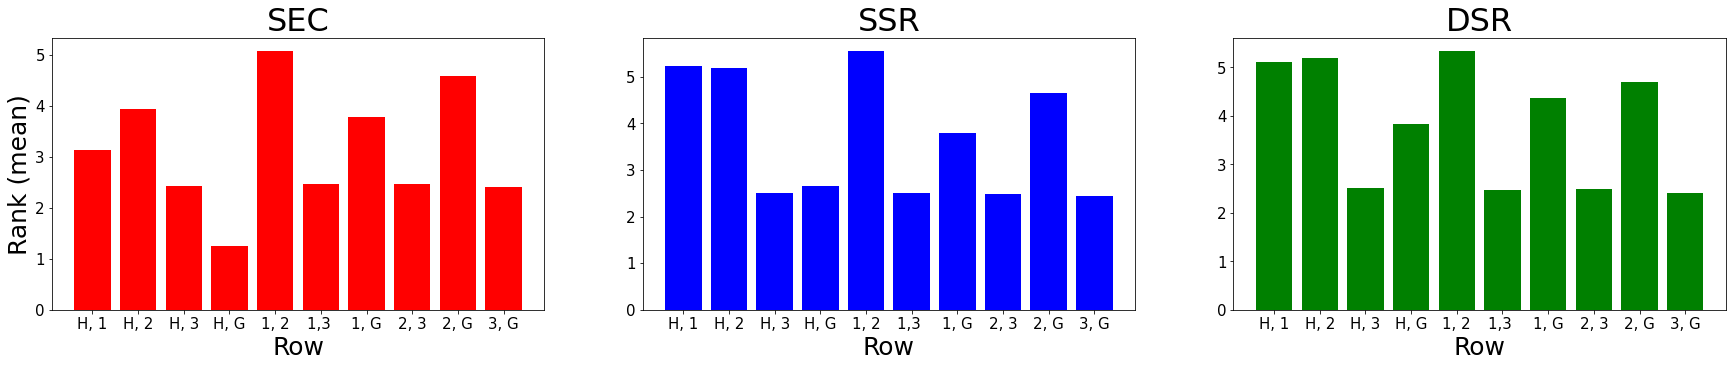

In [4]:
analyse.plotRowRanking(eSEC_matrices)

## With the knowlage about the importance of rows we can remove some of them and see if all manipulations are still distinguishable from each other.

In [5]:
#remove only single rows from the row array 
analyse.checkSimilarRows(eSEC_matrices, combination = 1, rows =  [0, 1, 5, 7, 9])

equalities bettween manipulation 1 and 2
equalities bettween manipulation 1 and 3
equalities bettween manipulation 2 and 1
equalities bettween manipulation 2 and 3
equalities bettween manipulation 3 and 1
equalities bettween manipulation 3 and 2
Same manipulations due to removement of row(s) [0]


In [6]:
#since rmoving row 0 leads to undistingushable manipulations change the rows and check all combinations
analyse.checkSimilarRows(eSEC_matrices, combination = 1, rows =  [3, 2, 5, 7, 9])
analyse.checkSimilarRows(eSEC_matrices, combination = 2, rows =  [3, 2, 5, 7, 9])
analyse.checkSimilarRows(eSEC_matrices, combination = 3, rows =  [3, 2, 5, 7, 9])
analyse.checkSimilarRows(eSEC_matrices, combination = 4, rows =  [3, 2, 5, 7, 9])
analyse.checkSimilarRows(eSEC_matrices, combination = 5, rows =  [3, 2, 5, 7, 9])

No manipulations are same for 1 combinations
No manipulations are same for 2 combinations
No manipulations are same for 3 combinations
No manipulations are same for 4 combinations
No manipulations are same for 5 combinations


## Since this combination of rows don't lead to indistinguishable manipulations even with a total of 5 rows removed, do an analysis of groups. To do so we need matrices with every possible combination of rows removed.

In [9]:
#removes all combinations of rows and saves the results in an folder structure
analyse.removeCobinationRowsSave(eSEC_matrices, rows =  [3, 2, 5, 7, 9])

## Now we can plot the dissimilarty matrices.

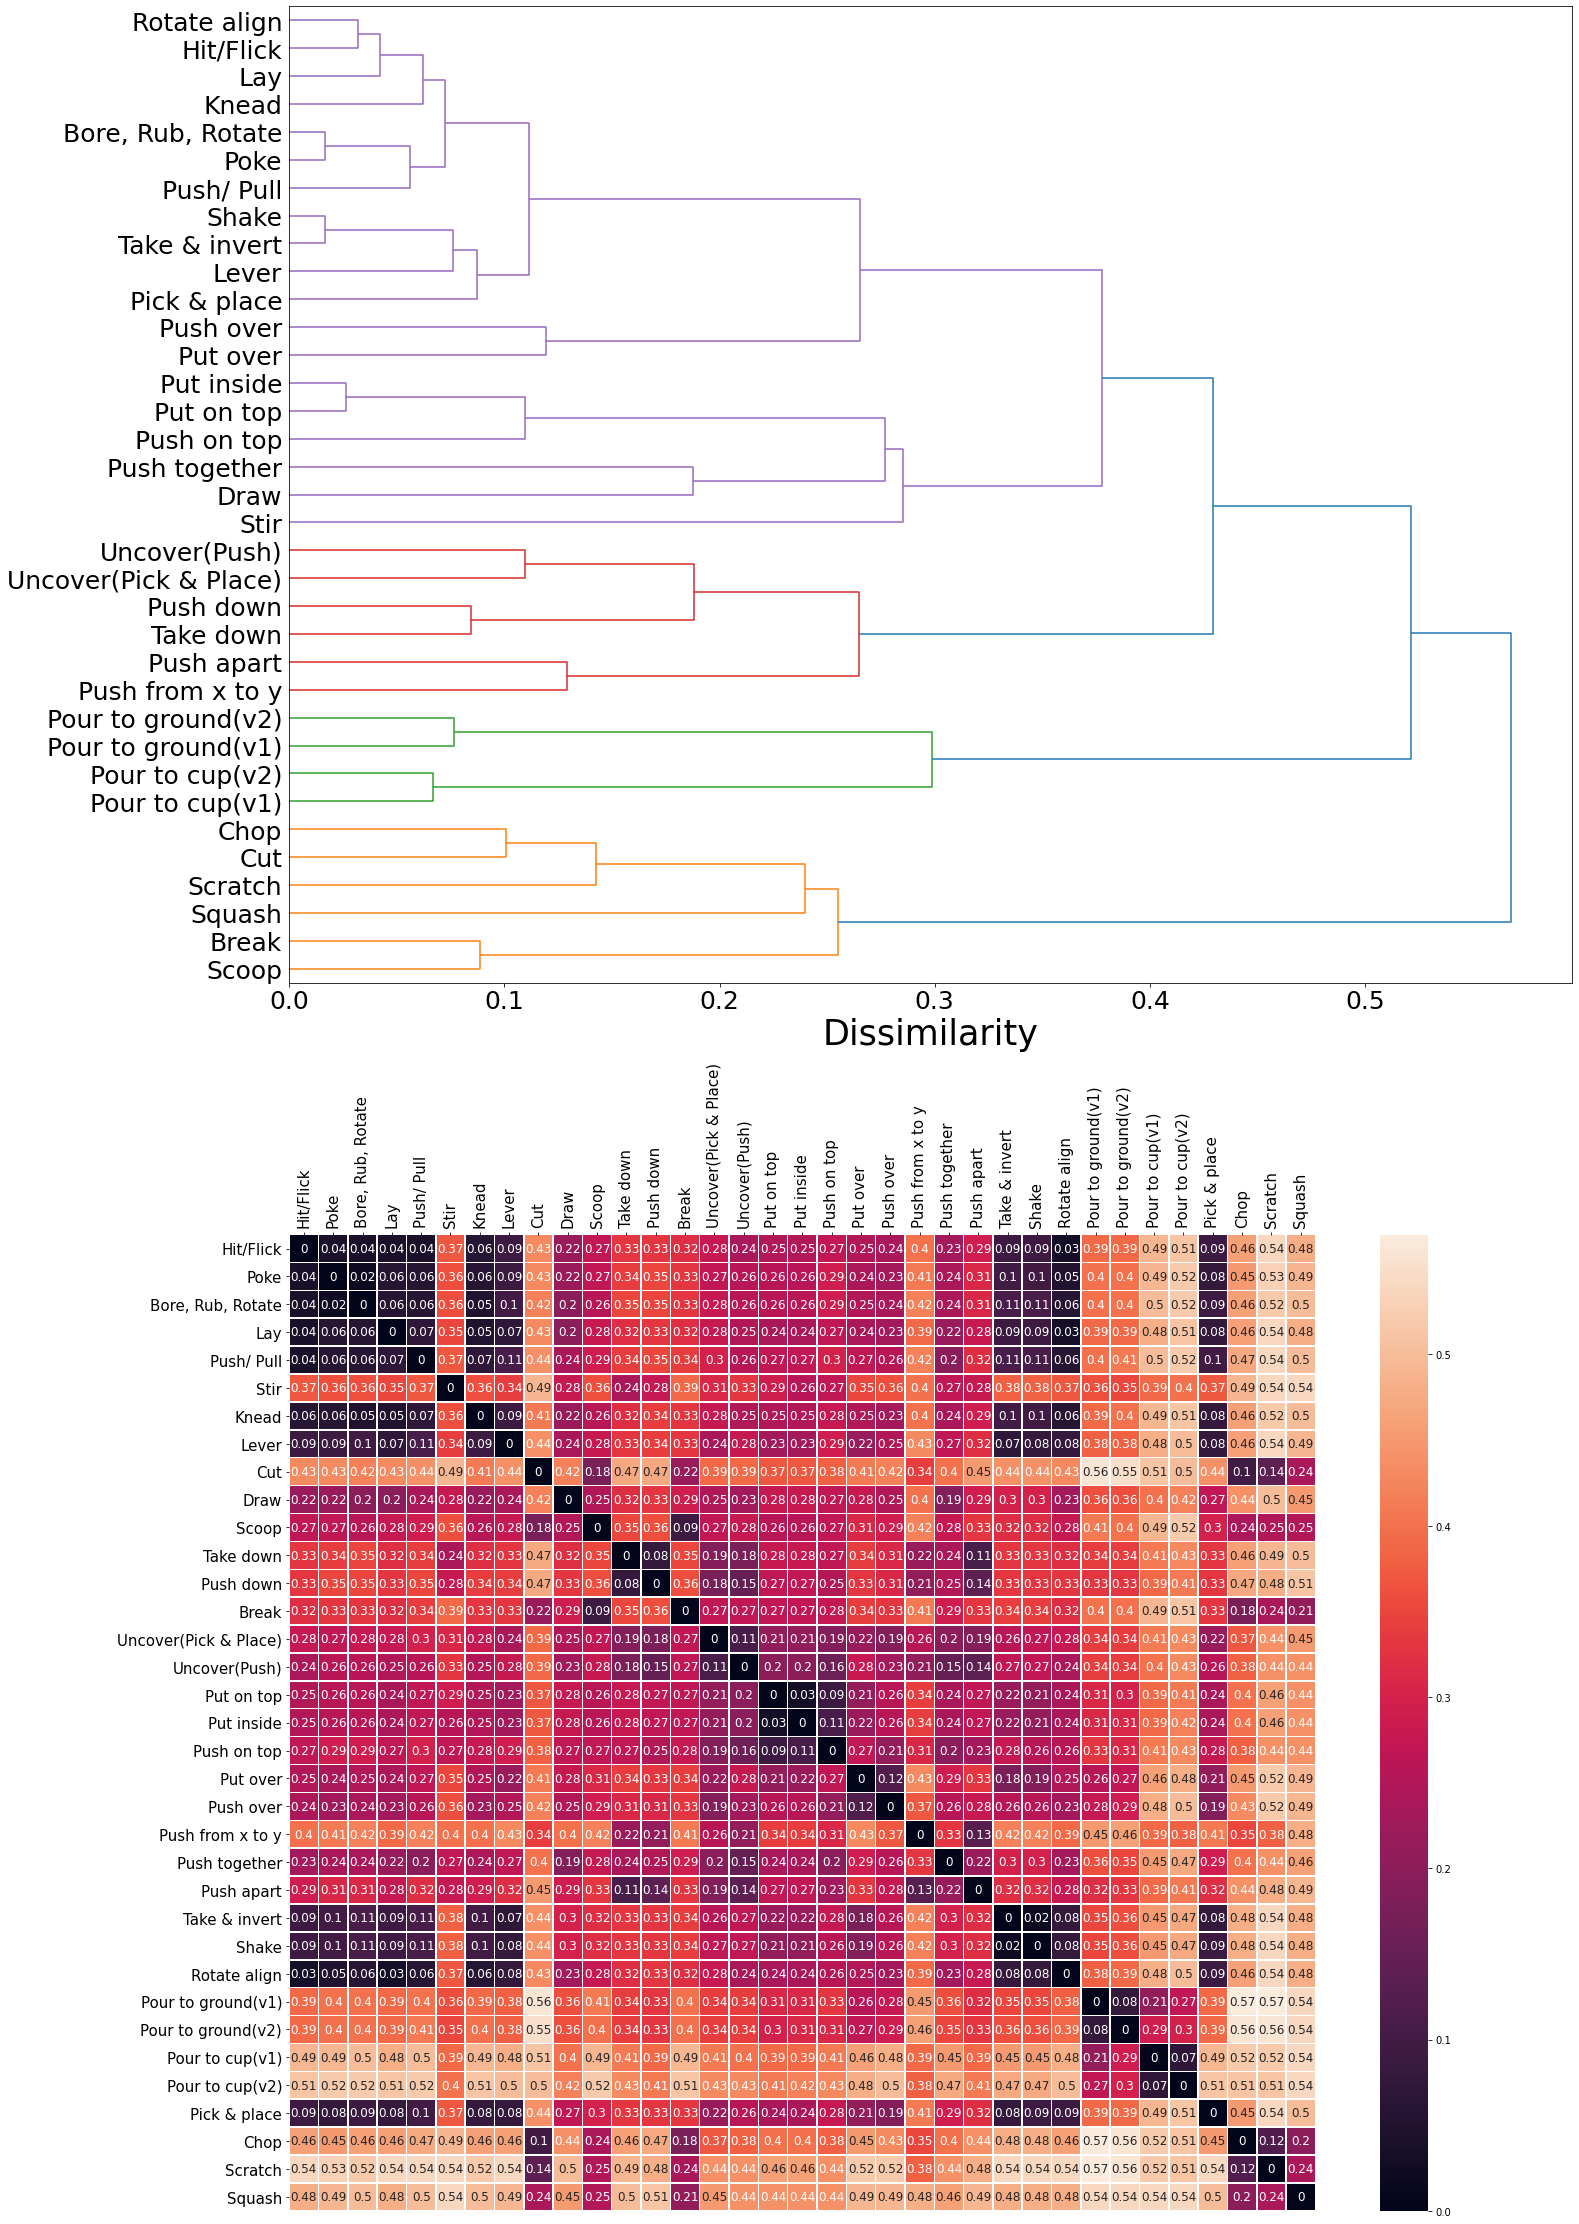

In [10]:
#define the labels in same order as eSEC matrices
label = ["Hit/Flick", "Poke", "Bore, Rub, Rotate", "Lay", "Push/ Pull", "Stir", "Knead", "Lever", "Cut", "Draw", "Scoop", "Take down", "Push down", "Break", "Uncover(Pick & Place)", "Uncover(Push)", "Put on top", "Put inside", "Push on top", "Put over", "Push over", "Push from x to y", "Push together", "Push apart", "Take & invert", "Shake", "Rotate align", "Pour to ground(v1)", "Pour to ground(v2)", "Pour to cup(v1)", "Pour to cup(v2)", "Pick & place", "Chop", "Scratch", "Squash"]
#in this case we plot the Dendrogramm and dissimilarity matrix with removed rows 3,2,5
analyse.plotDendroDissimi((3,2,5), label)

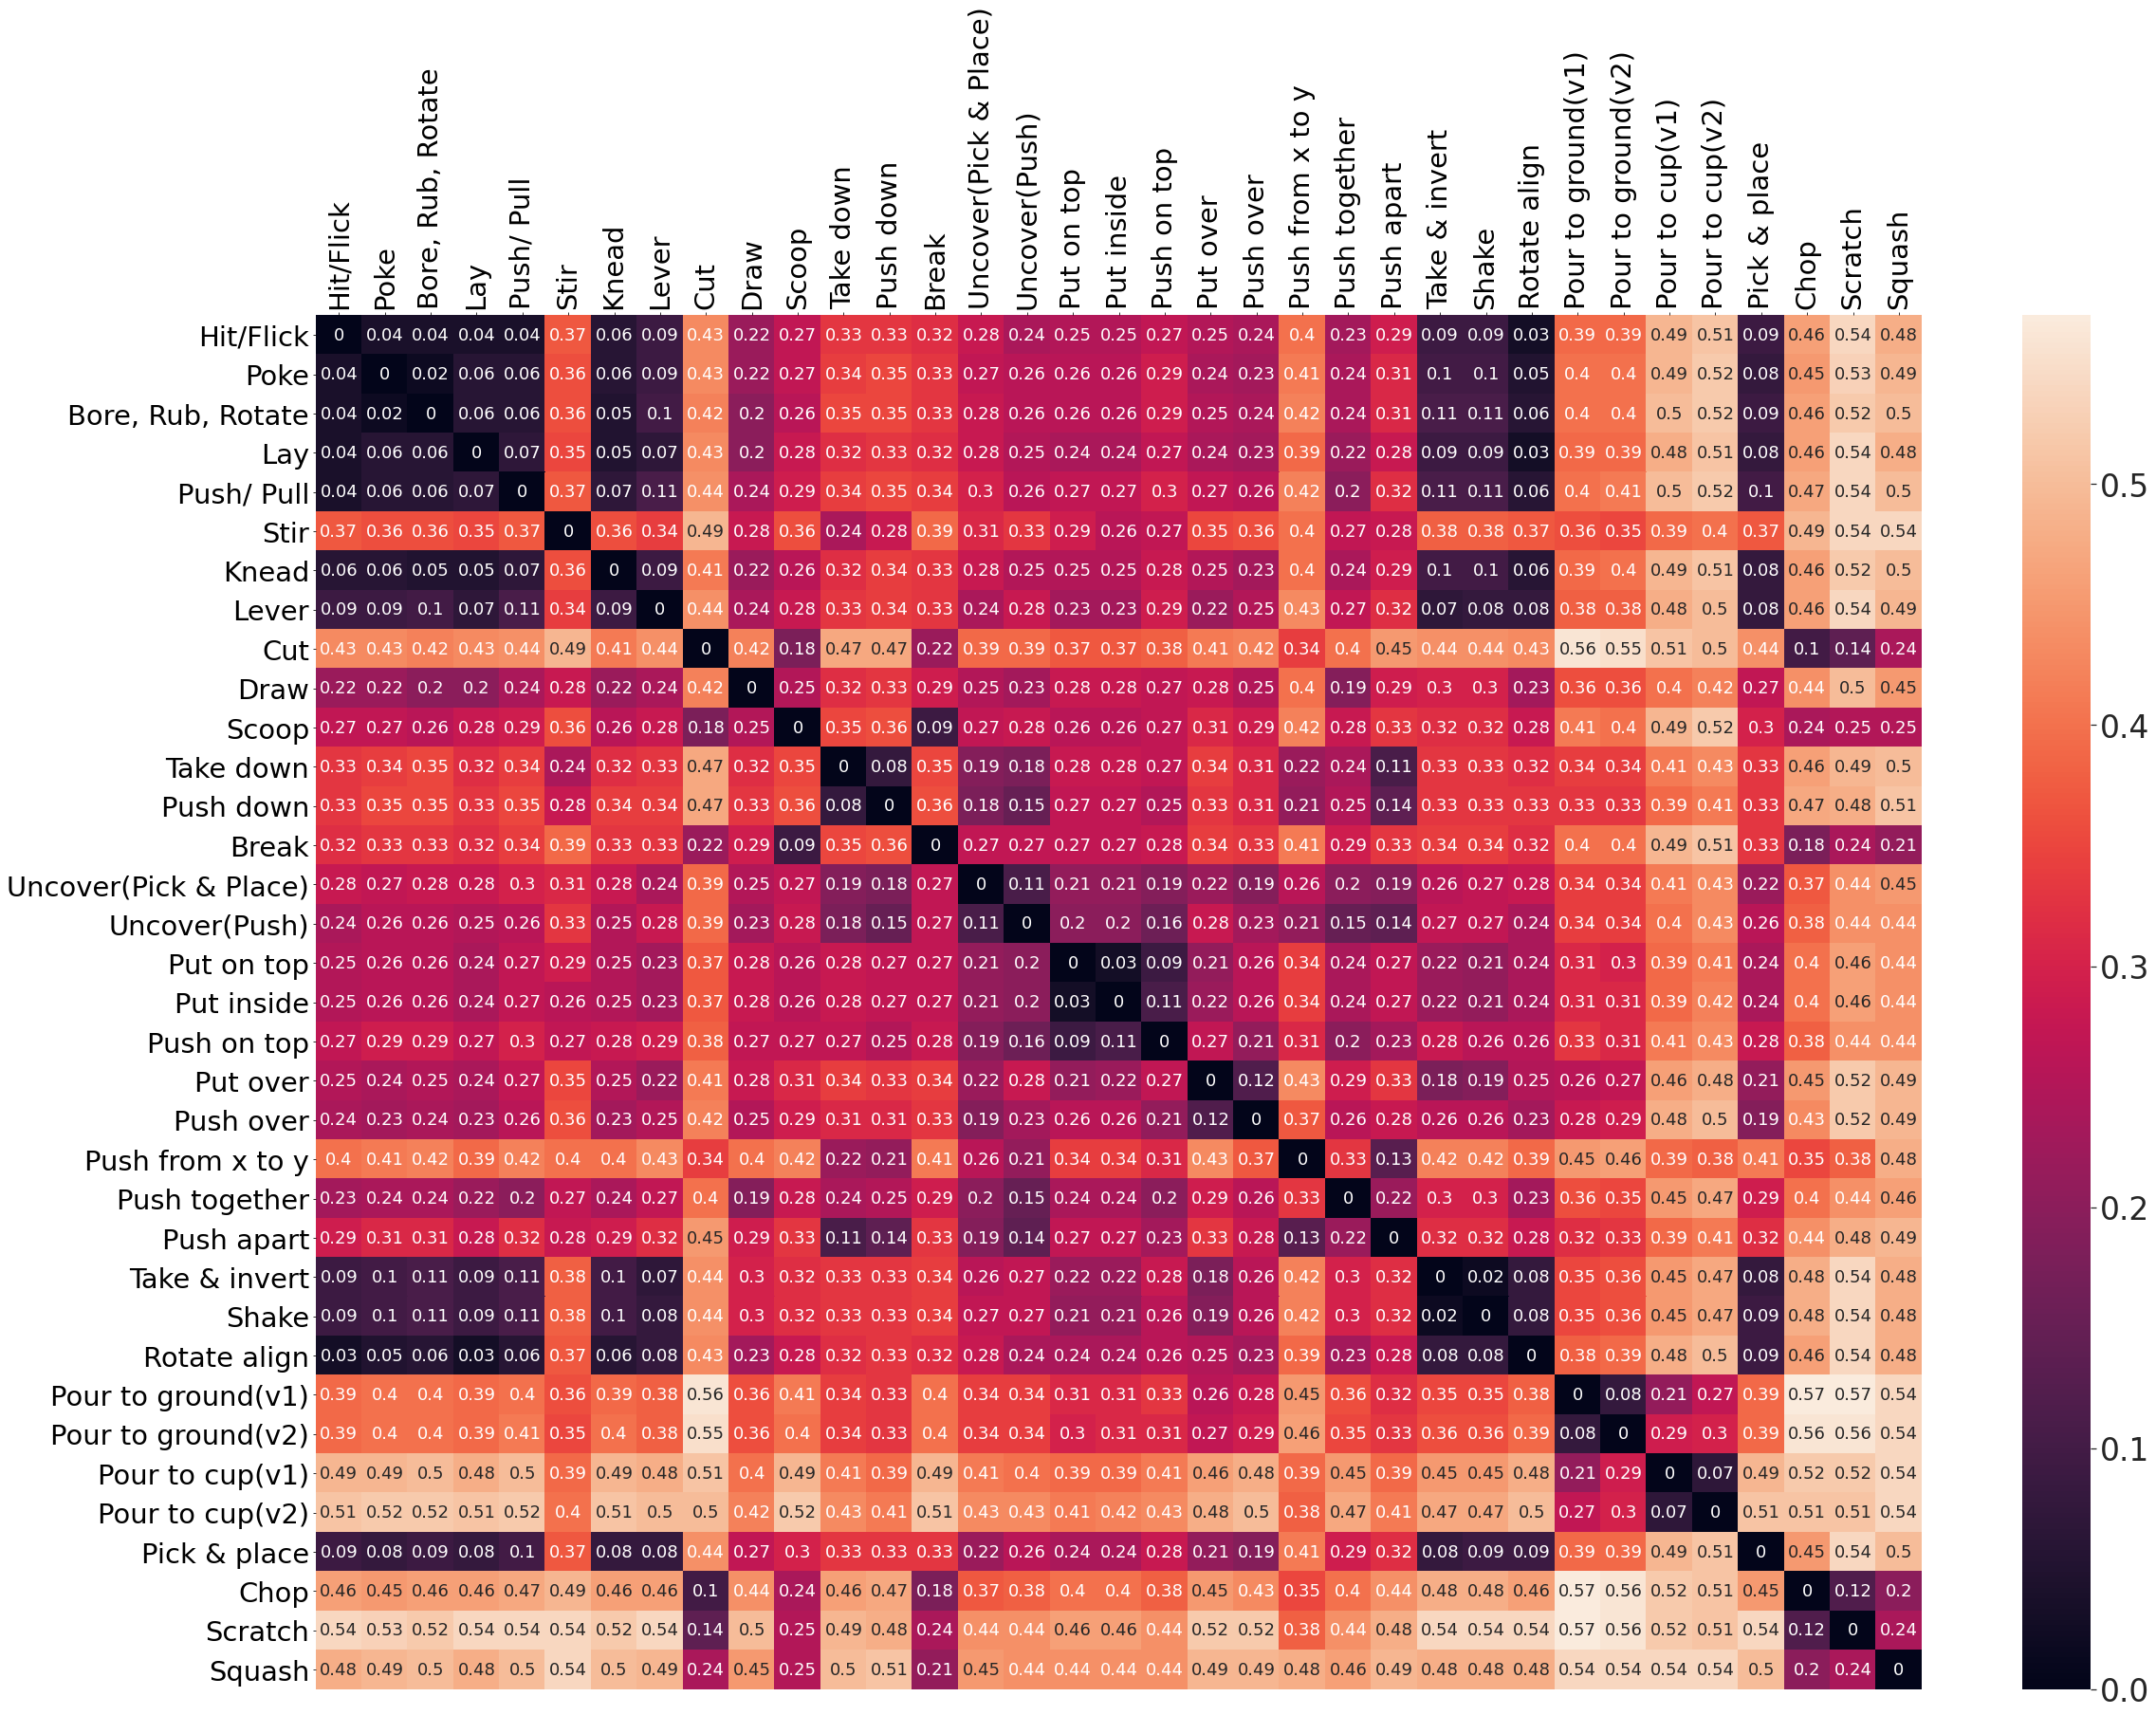

In [11]:
#in case we only want to plot the dissimilarity matrix
analyse.plotDissi((3,2,5), label)

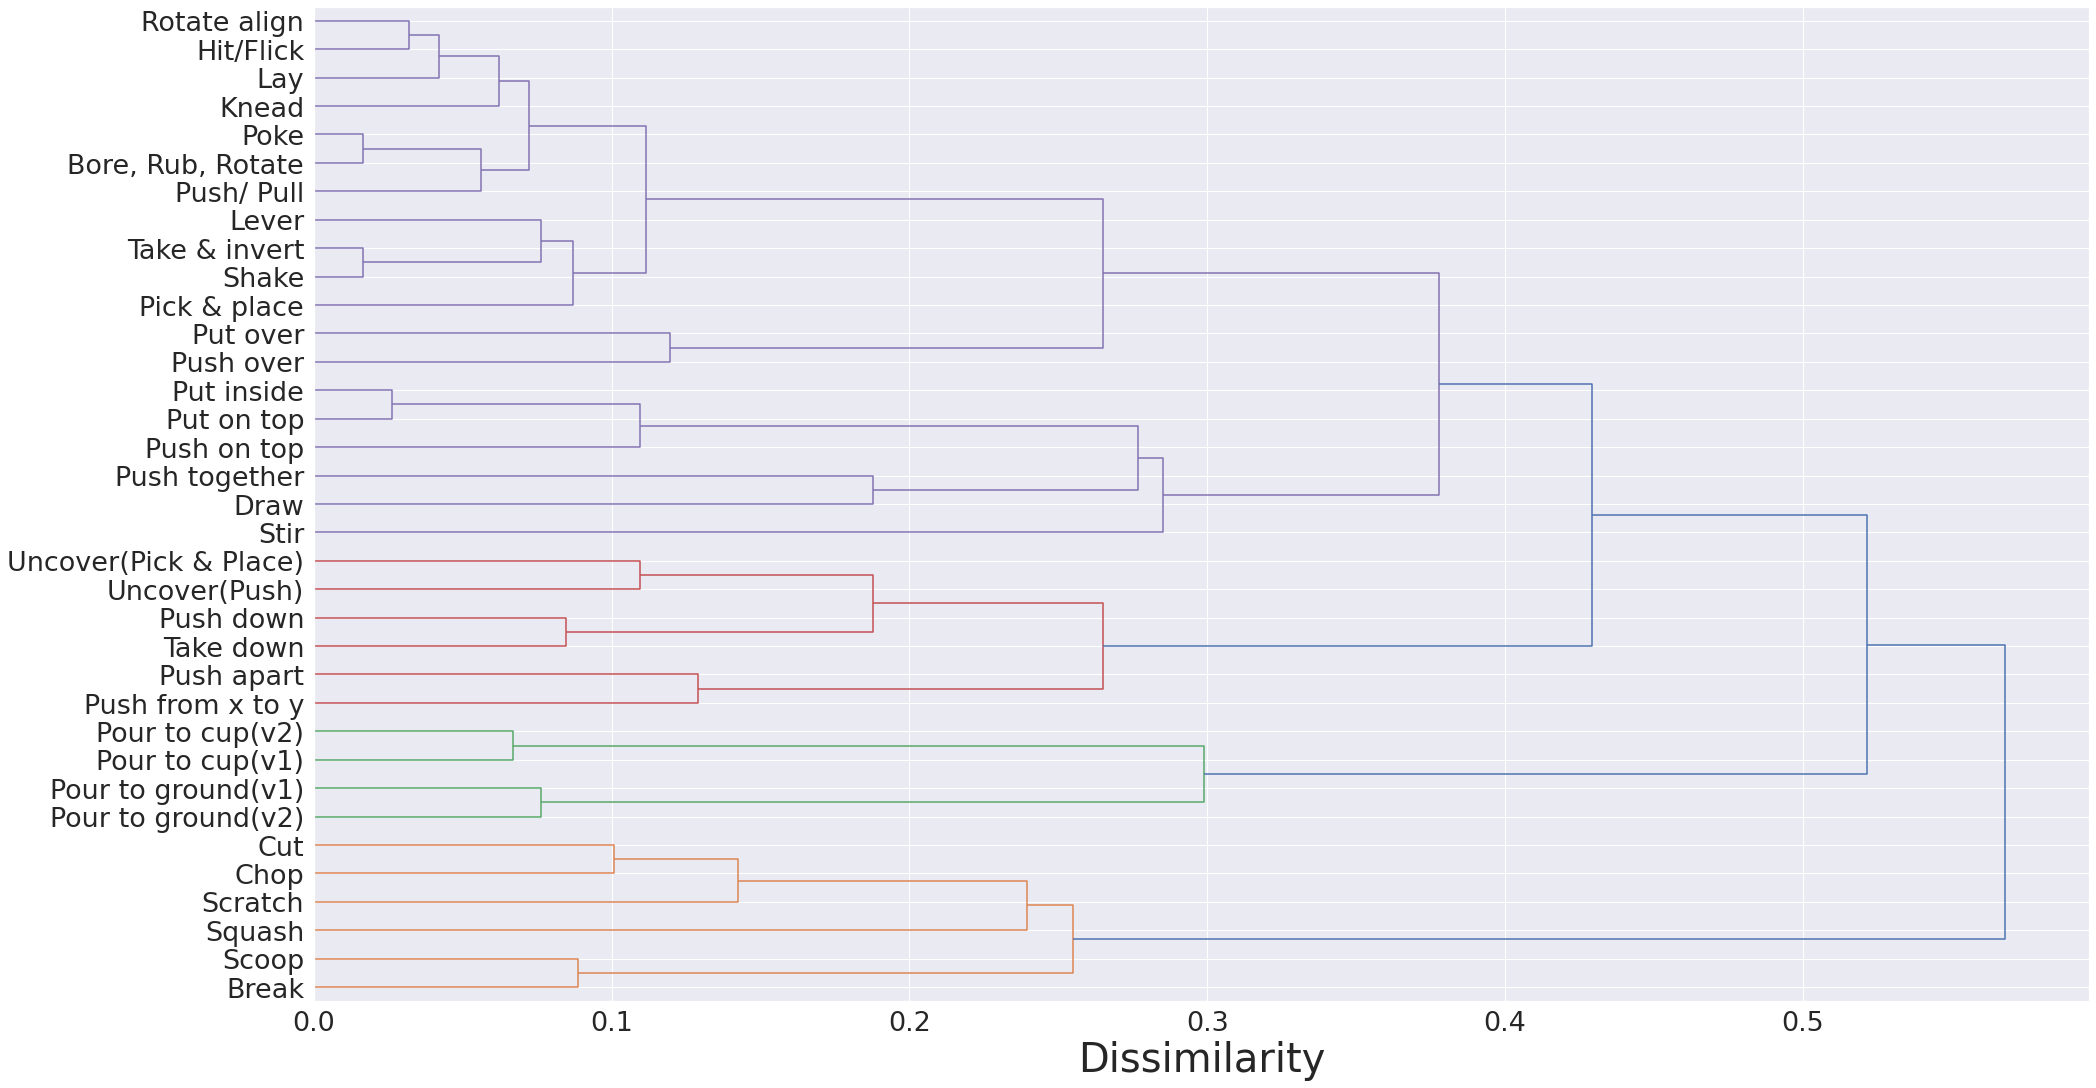

In [12]:
#in case we only want to plot the dendrogram
analyse.plotDendrogram((3,2,5), label)

In case the folder structure is not there but the dendrogram and dissimilarity is needed we use another function.

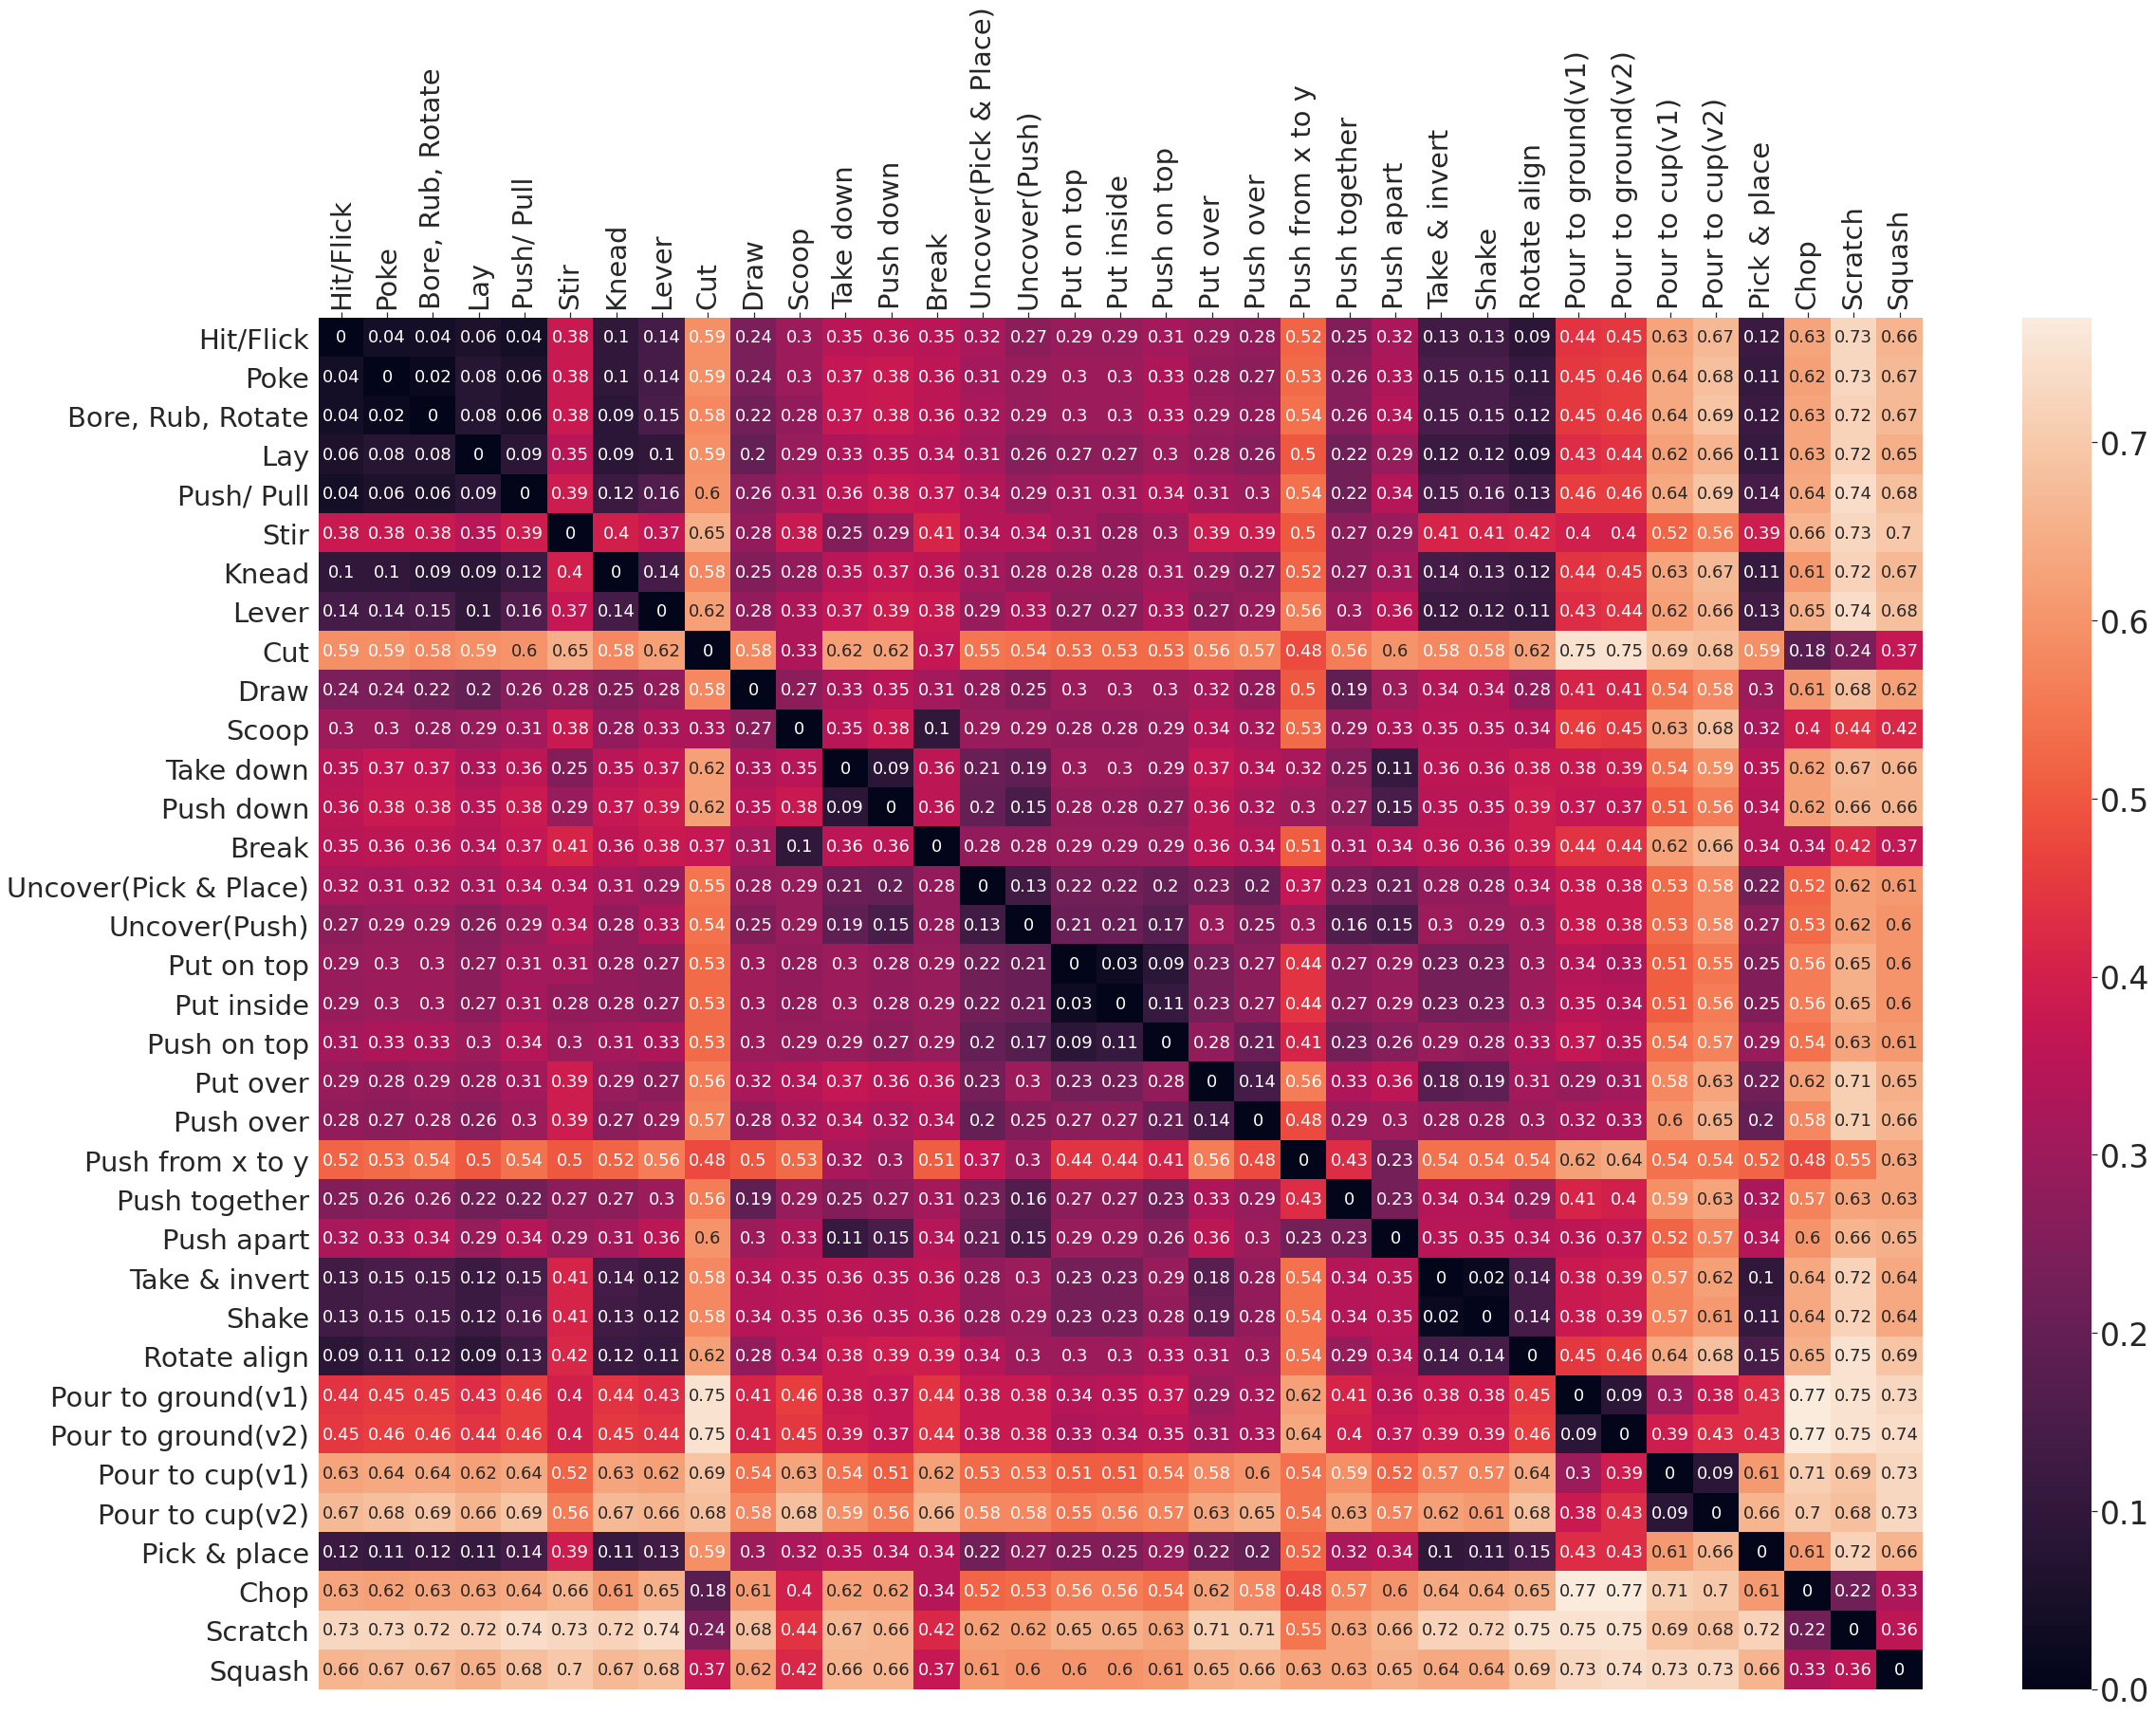

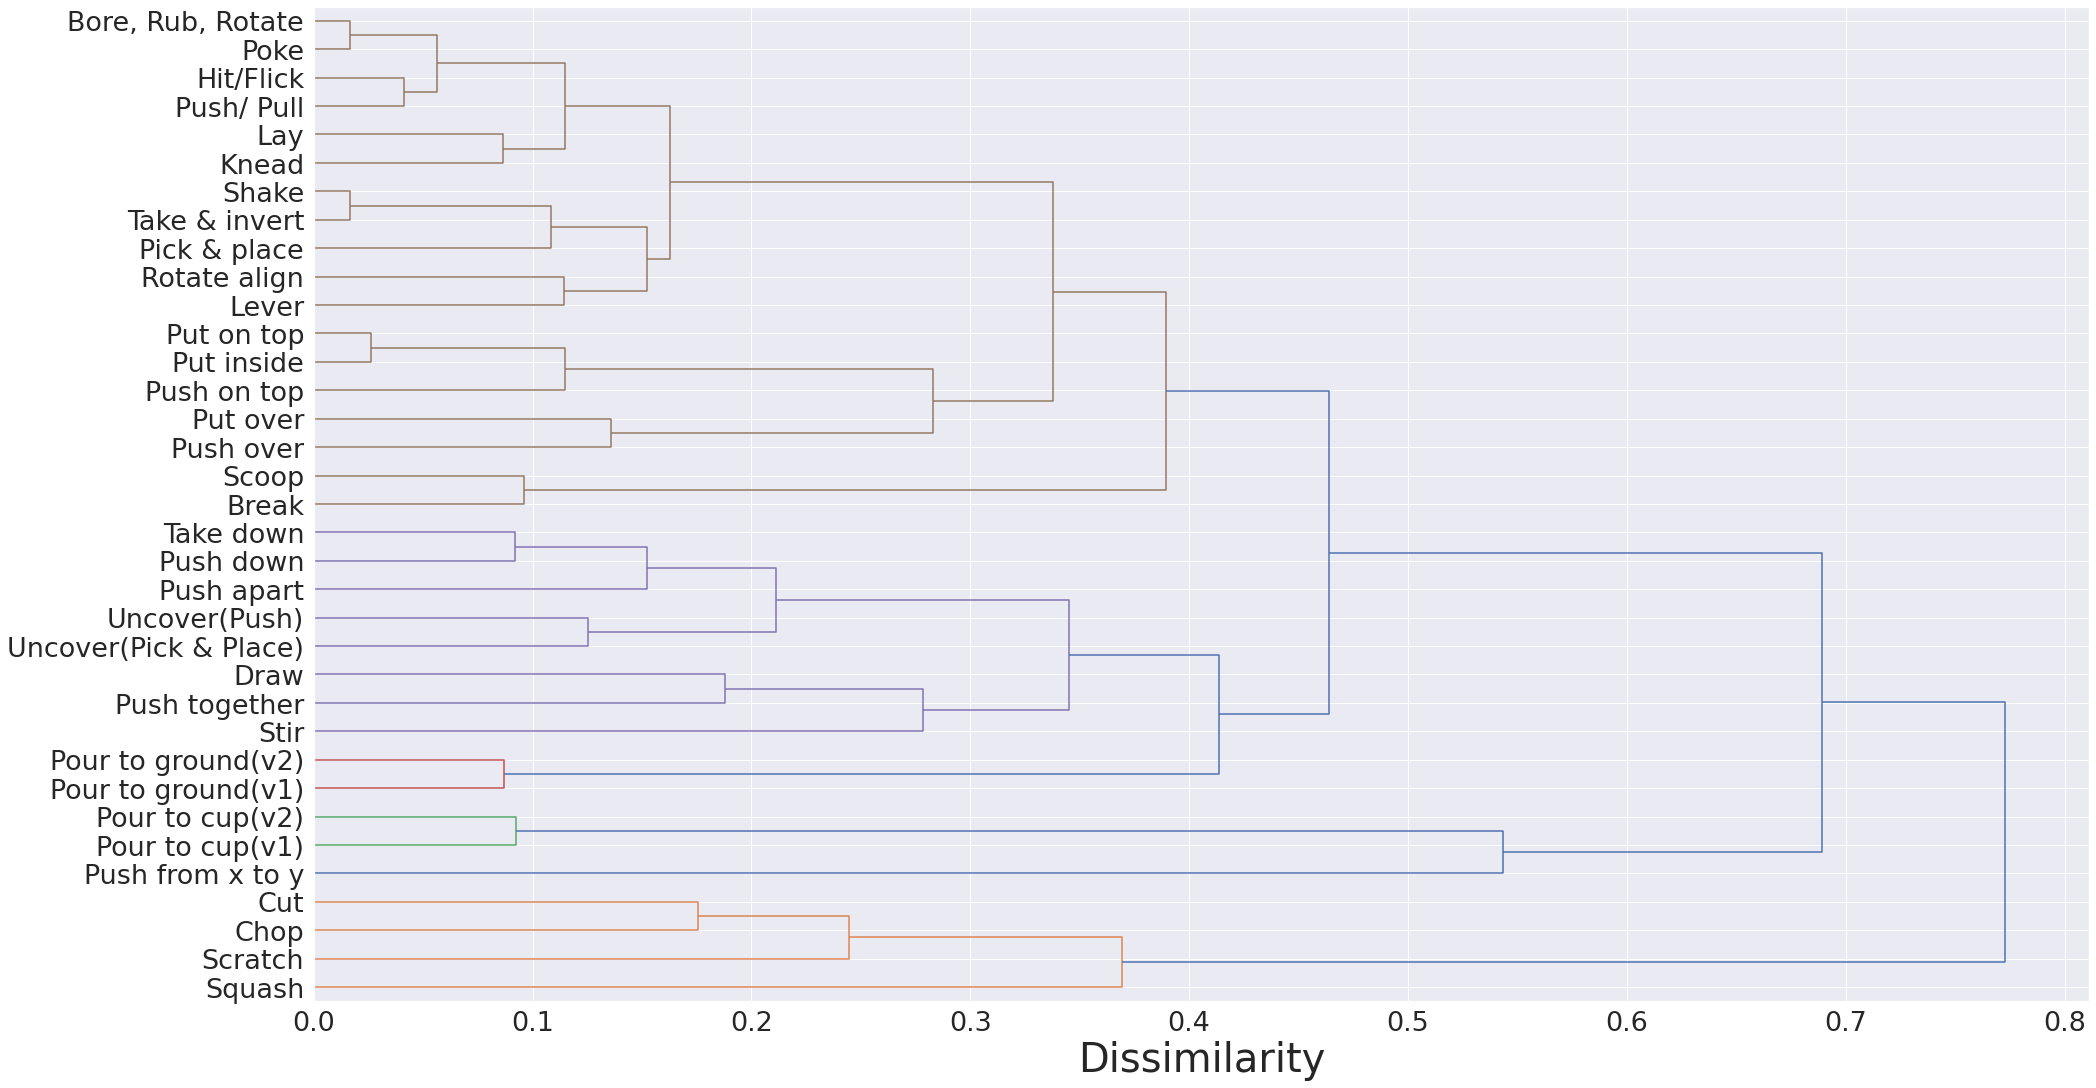

In [13]:
#calculate dissimilariy matrix from paper and plot them
dissimilartiy_matrix = analyse.getDissimilarityMatrix(eSEC_matrices)
analyse.plotDissiFromMatrix(dissimilartiy_matrix, label)
analyse.plotDendrogramFromMatrix(dissimilartiy_matrix, label)

KeyboardInterrupt: 

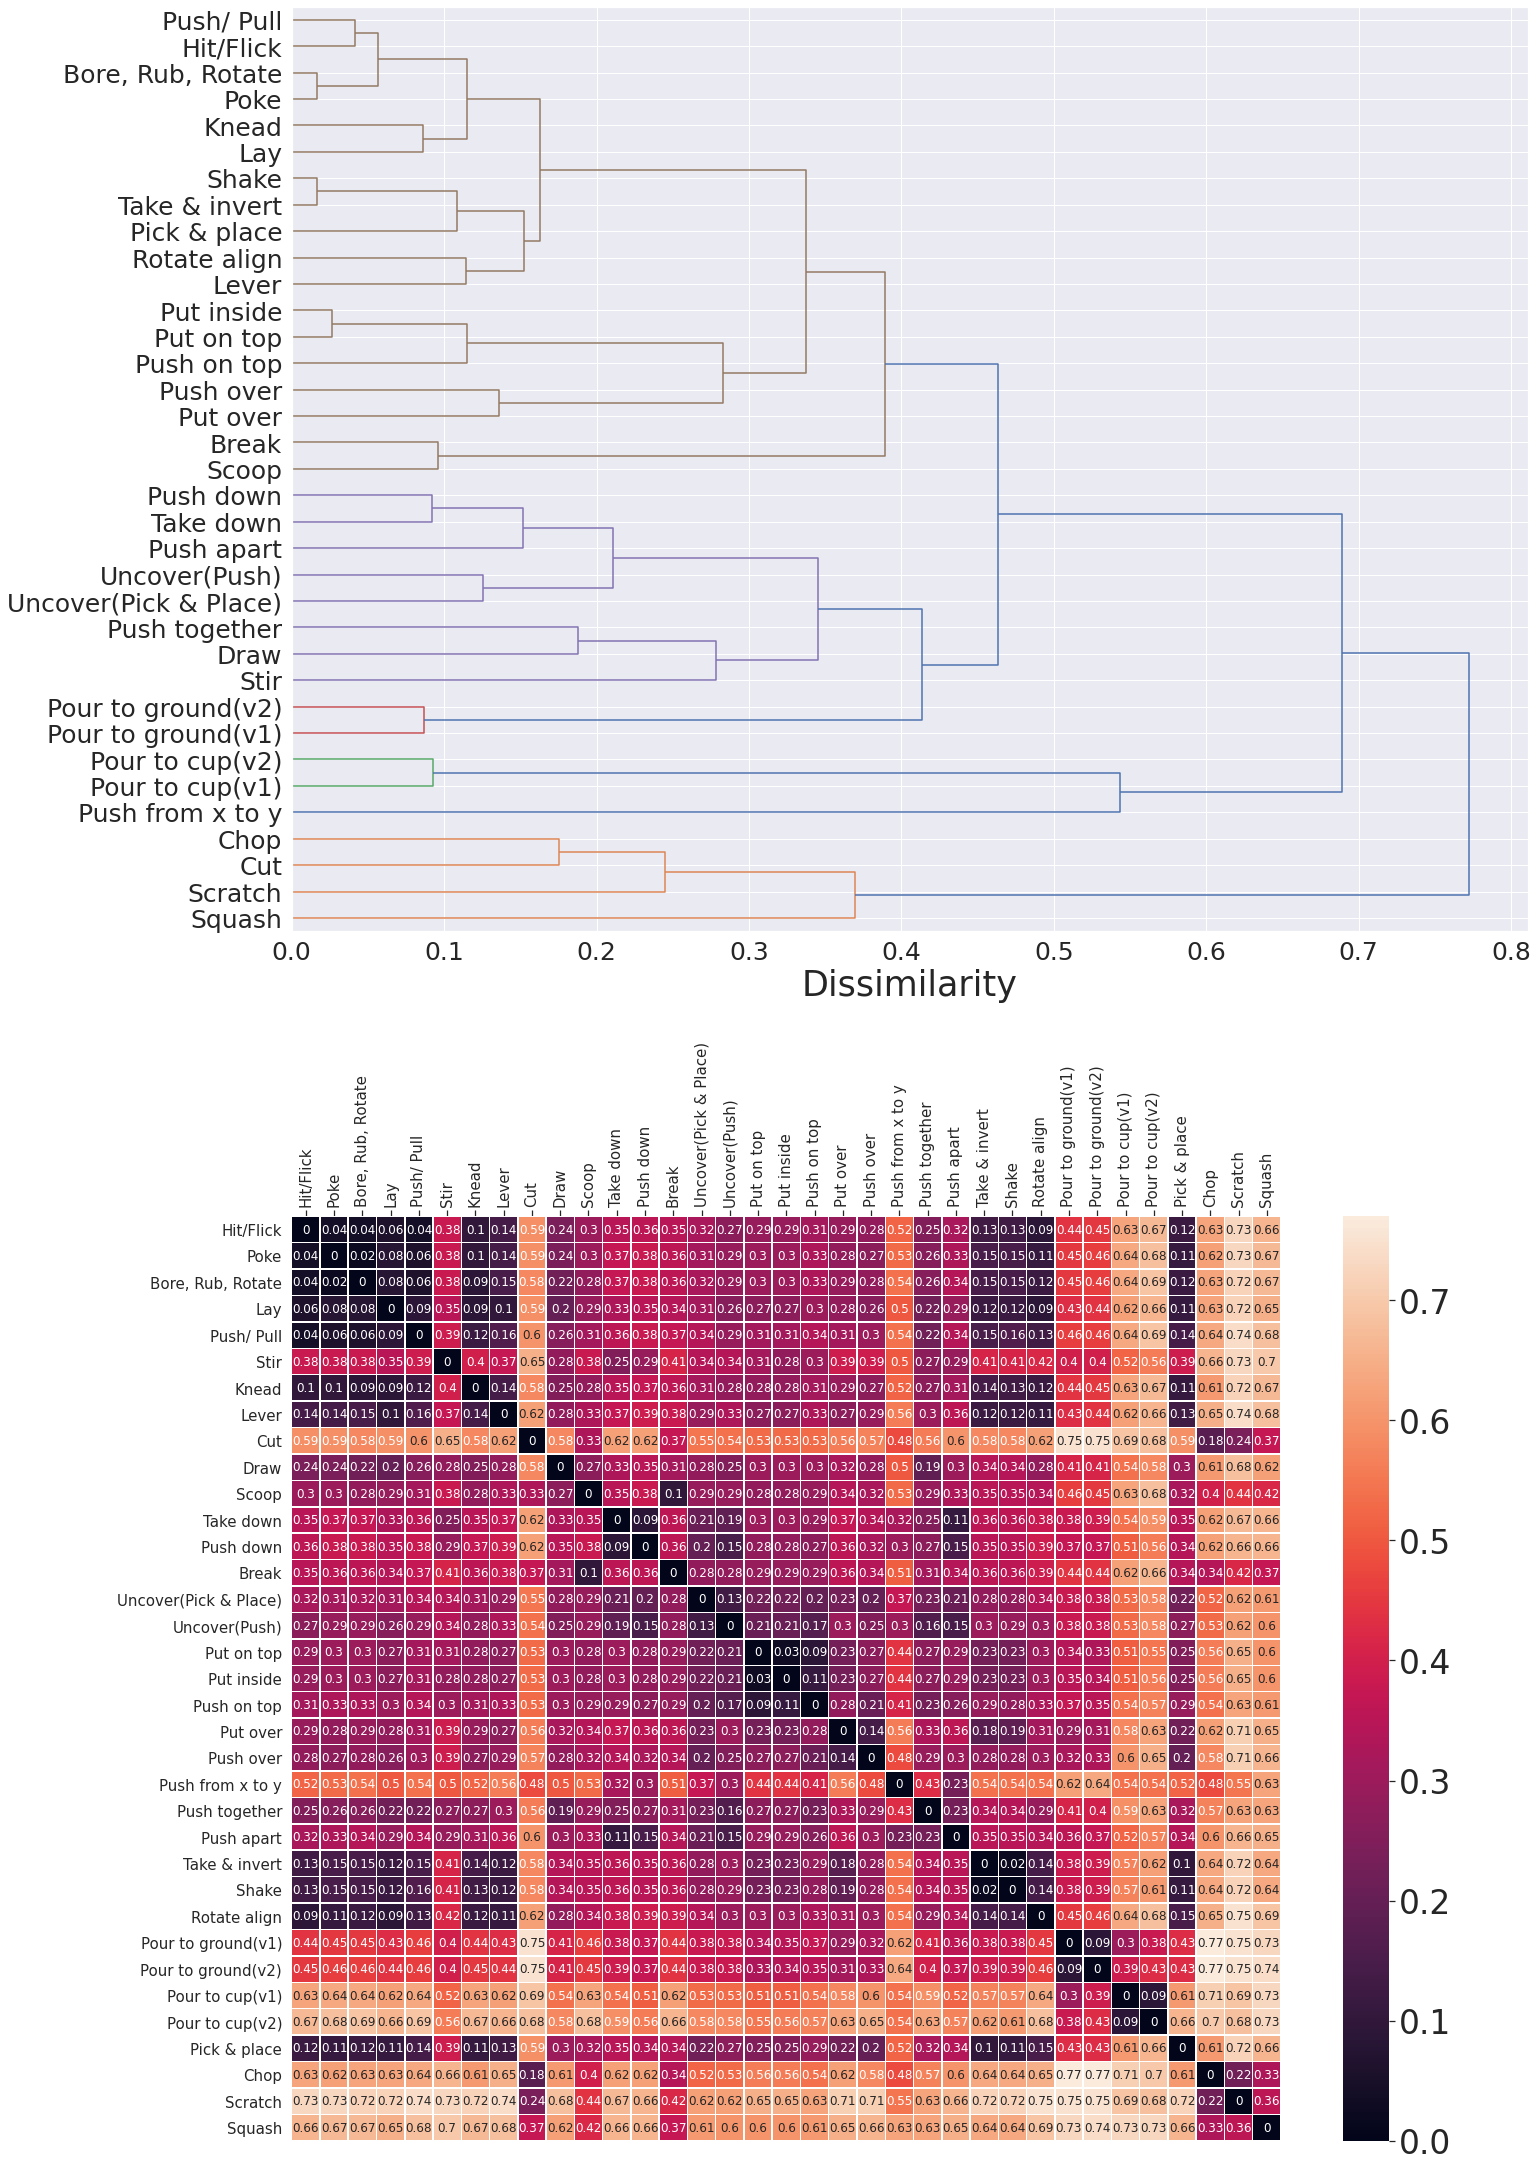

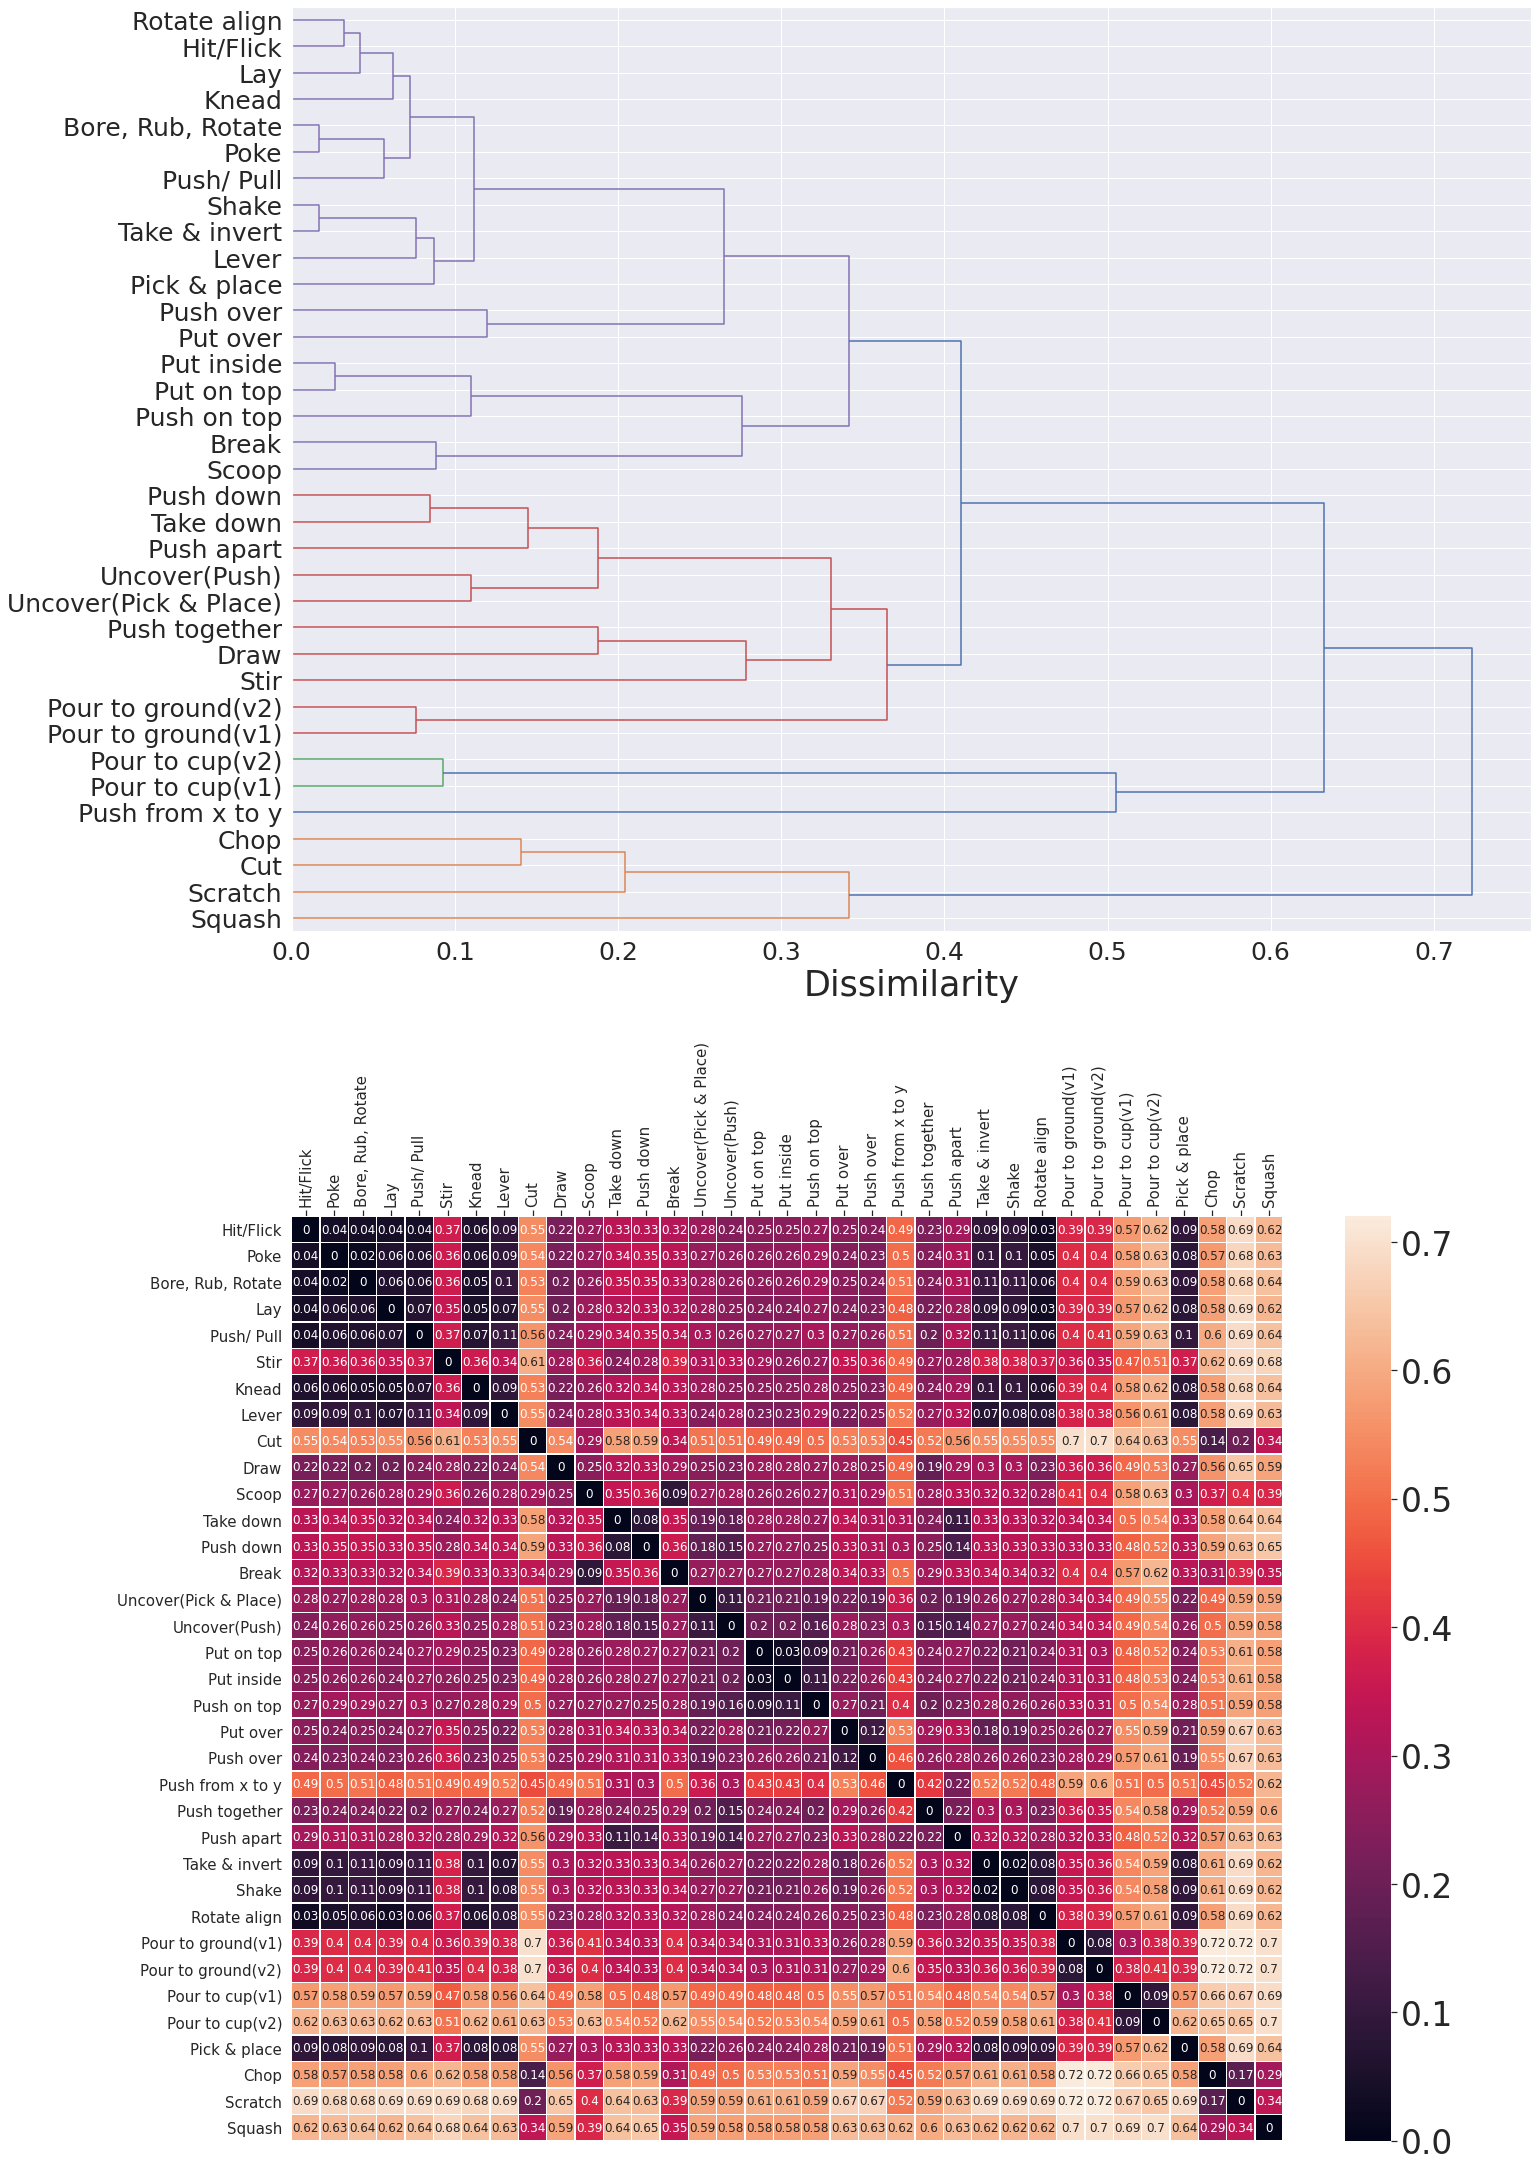

In [14]:
#Plots the dendrogram and dissimilarity matrix for all combinations of removed rows in the "array" folder structure.
#takes some time
analyse.plotAllMatrices(path = "", label = label)